# Part I

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from key_api import api_key
from citipy import citipy
from datetime import datetime

In [11]:
output_file = "cities.csv"
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List 

In [12]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

### Perform API Calls 

In [14]:
url = "http://api.openweathermap.org/data/2.5/weather?appid={api_key}&q={city_name}&units=imperial"

In [15]:
# Create lists to store each column of data. 
cities_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_list = []
wind_list = []

In [16]:
set_flag = 1
record_flag = 1
print("Beginning Data Retrieval" + "\n--------------------------")
for city_name in cities:
    url_request = url.format(city_name = city_name, api_key = api_key)    
    response = requests.get(url_request)
    # Get status code frorm the request. If it is not '200', skip. 
    if response.status_code == 200:  
        print("Processing Record " + str(record_flag) + " of Set " + str(set_flag) + " | " + city_name)
        # Store the data retrieved from the response into each list.
        response = requests.get(url_request).json()
        cities_list.append(response['name'])
        cloudiness_list.append(response['clouds']['all'])
        country_list.append(response['sys']['country'])
        date_list.append(response['dt'])
        humidity_list.append(response['main']['humidity'])
        lat_list.append(response['coord']['lat'])
        lng_list.append(response['coord']['lon'])
        max_list.append(response['main']['temp_max'])
        wind_list.append(response['wind']['speed'])
        record_flag += 1 
        if record_flag == 51:
            record_flag = 0
            set_flag += 1
    else:
        print("City not found. Skipping...")

Beginning Data Retrieval
--------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | rujiena
Processing Record 3 of Set 1 | port alfred
Processing Record 4 of Set 1 | dikson
City not found. Skipping...
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | hobart
Processing Record 7 of Set 1 | ushuaia
City not found. Skipping...
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | monroe
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | port elizabeth
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | puerto ayora
Processing Record 14 of Set 1 | upernavik
Processing Record 15 of Set 1 | castro
Processing Record 16 of Set 1 | arlit
Processing Record 17 of Set 1 | abu kamal
Processing Record 18 of Set 1 | yellowknife
Processing Record 19 of Set 1 | vila franca do campo
Processing Record 20 of Set 1 | hastings
Processing Record 21 of Set 1 | kapaa
Processing Record 22 of S

Processing Record 34 of Set 4 | tateyama
City not found. Skipping...
Processing Record 35 of Set 4 | la gomera
Processing Record 36 of Set 4 | amga
Processing Record 37 of Set 4 | talnakh
Processing Record 38 of Set 4 | puerto cabezas
Processing Record 39 of Set 4 | anchorage
Processing Record 40 of Set 4 | monte mor
Processing Record 41 of Set 4 | klobuck
Processing Record 42 of Set 4 | mari-turek
Processing Record 43 of Set 4 | isangel
Processing Record 44 of Set 4 | longyearbyen
Processing Record 45 of Set 4 | acurenam
Processing Record 46 of Set 4 | airai
Processing Record 47 of Set 4 | bambanglipuro
Processing Record 48 of Set 4 | barra
Processing Record 49 of Set 4 | asau
Processing Record 50 of Set 4 | alihe
Processing Record 0 of Set 5 | menongue
Processing Record 1 of Set 5 | trinidad
Processing Record 2 of Set 5 | prince rupert
Processing Record 3 of Set 5 | ambilobe
Processing Record 4 of Set 5 | quatre cocos
Processing Record 5 of Set 5 | sorong
City not found. Skipping...


Processing Record 18 of Set 8 | sergeyevka
Processing Record 19 of Set 8 | bud
Processing Record 20 of Set 8 | pingzhuang
City not found. Skipping...
City not found. Skipping...
Processing Record 21 of Set 8 | broken hill
Processing Record 22 of Set 8 | okhotsk
Processing Record 23 of Set 8 | dryden
Processing Record 24 of Set 8 | lorengau
Processing Record 25 of Set 8 | cascais
Processing Record 26 of Set 8 | monitos
Processing Record 27 of Set 8 | luganville
Processing Record 28 of Set 8 | tagusao
Processing Record 29 of Set 8 | tezu
Processing Record 30 of Set 8 | juneau
Processing Record 31 of Set 8 | roald
Processing Record 32 of Set 8 | birjand
Processing Record 33 of Set 8 | chulym
Processing Record 34 of Set 8 | otane
Processing Record 35 of Set 8 | kuantan
Processing Record 36 of Set 8 | liverpool
Processing Record 37 of Set 8 | ransang
Processing Record 38 of Set 8 | inuvik
Processing Record 39 of Set 8 | juru
Processing Record 40 of Set 8 | pevek
Processing Record 41 of Set 

### Convert Raw Data to DataFrame 

In [17]:
# Create DataFrame based on a dictionary and store it as a CSV.
cities_dict = {"City":cities_list, "Cloudiness":cloudiness_list, "Country":country_list,
                "Date":date_list, "Humidity":humidity_list, "Lat":lat_list, "Lng":lng_list,
                "Max Temp":max_list, "Wind Speed":wind_list}
cities_output = pd.DataFrame(cities_dict)
cities_output.index.name = "City ID"
cities_output.to_csv("cities.csv", encoding='utf-8')
cities_output.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City ID,,,,,,,,,
0,Punta Arenas,40,CL,1585187951,71,-53.15,-70.92,55.40,17.22
1,Rūjiena,0,LV,1585188143,87,57.90,25.33,32.32,8.84
2,Port Alfred,90,ZA,1585188060,59,-33.59,26.89,64.74,33.40
3,Dikson,100,RU,1585188067,97,73.51,80.55,21.78,22.70
4,Rikitea,100,PF,1585188058,76,-23.12,-134.97,78.84,5.35


### Plotting the Data 

In [18]:
# Transform UNIX to datetime
cities_output["Date"] = pd.to_datetime(cities_output["Date"], unit='s')
cities_output["Date"] = cities_output["Date"].dt.date
df = cities_output

#### Latitude vs. Temperature Plot

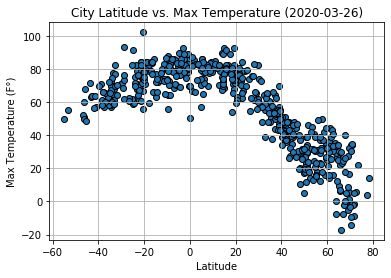

In [19]:
plt.scatter(x = df['Lat'], y = df['Max Temp'], edgecolors="k")
date = str(df["Date"].iloc[1])
plt.title("City Latitude vs. Max Temperature " + "(" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F°)")
plt.grid(axis="both")
plt.savefig("Fig1.png")
plt.show()

What the plot is telling is that the northest the city is, the coldest the weather is. Also, that the temperature stabilizes when from the -30 to 20 latitude; the temperature stays at 20 to 20° C. And all of these makes sense, because of the position of the earth and the seasons of the year. 

#### Latitude vs. Humidity Plot

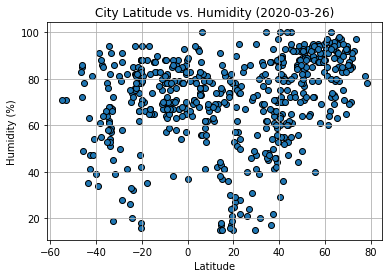

In [20]:
plt.scatter(x = df['Lat'], y = df['Humidity'], edgecolors="k")
date = str(df["Date"].iloc[1])
plt.title("City Latitude vs. Humidity " + "(" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(axis="both")
plt.savefig("Fig2.png")
plt.show()

It can be infered that the northen hemisphere is quite diverse on the temperature percentage, meanwhile the southern hemisphere's humidity is quite high. The equator (0 Latitude) has, as it's expected, a really high and stable humidity percentage. 

#### Latitude vs. Cloudiness Plot

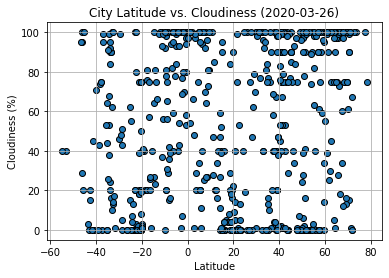

In [21]:
plt.scatter(x = df['Lat'], y = df['Cloudiness'], edgecolors="k")
date = str(df["Date"].iloc[1])
plt.title("City Latitude vs. Cloudiness " + "(" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(axis="both")
plt.savefig("Fig3.png")
plt.show()

It can infered that the cloudiness is quite higher in northern hemisphere. But it´s not really a big difference between both hemispheres. There's no relationship between the latitude and the humidity.

#### Latitude vs. Wind Speed Plot

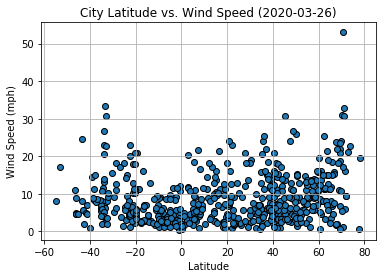

In [22]:
plt.scatter(x = df['Lat'], y = df['Wind Speed'], edgecolors="k")
date = str(df["Date"].iloc[1])
plt.title("City Latitude vs. Wind Speed " + "(" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(axis="both")
plt.savefig("Fig4.png")
plt.show()

 Wind speed stays quite stable from the -50 to 60 latitute. But there are some outliers near to the 70 latitude. There might be some storms that increased the wind speed at that latitude. Nevertheless, there might be a relationship between these two variables. 

## Linear Regression 

In [23]:
from scipy import stats

In [24]:
# Function for Linear Regression. 
def linear_regression(x, y):
    x_name = x.name
    y_name = y.name
    # Linear Regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    # Build equation
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Get R squared
    r_squared = r_value**2
    # Get prediction based on the linear regression
    y_data = intercept + slope * x
    print("Linear Equation: " + line_eq)
    print("The r-squared is: " + str(r_squared))
    # Plot the data
    plt.scatter(x, y)
    plt.plot(x, y_data, color='red')
    plt.annotate(line_eq, xy = (20, 25), fontsize = 15, color= "red")
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.show()


In [25]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = df.loc[df["Lat"] >= 0,:]
southern_df = df.loc[df["Lat"] < 0, :]

#### Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Linear Equation: y = -1.11x + 91.09
The r-squared is: 0.8115002067382672


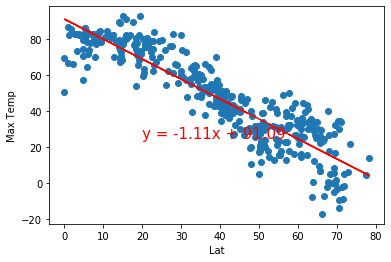

In [26]:
x = northern_df["Lat"]
y = northern_df["Max Temp"]
linear_regression(x,y)

There's a strong relationship between these variables. It means that the higher the temeprature at this time of the year (and hour), the southest the place will be. 

#### Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Linear Equation: y = 0.5x + 83.33
The r-squared is: 0.42958749410163194


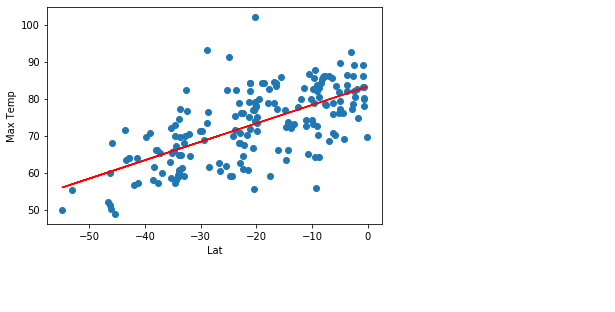

In [27]:
x = southern_df["Lat"]
y = southern_df["Max Temp"]
linear_regression(x,y)

In the southern hemisphere the relationship between max temperature and the location of the place is not really strong. There are some outliers at -20 to -30 latitude; that totally afects the equation. 

#### Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Linear Equation: y = 0.41x + 56.12
The r-squared is: 0.1735674512354094


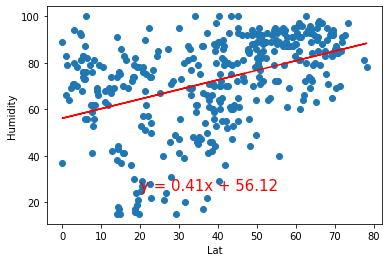

In [28]:
x = northern_df["Lat"]
y = northern_df["Humidity"]
linear_regression(x,y)

There's almost no relationship between these two variables. It matters little if the humidity is high or low, the latitue might be closer to 0 or 90. This equation it's not valid. 

#### Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Linear Equation: y = 0.29x + 75.94
The r-squared is: 0.053904182760461036


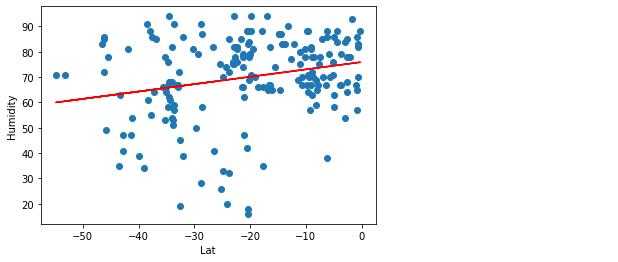

In [29]:
x = southern_df["Lat"]
y = southern_df["Humidity"]
linear_regression(x,y)

 There's almost no relationship between these two variables. It matters little if the humidity is high or low, the latitue might be closer to -90 or 0. This equation it's not valid. 

#### Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Linear Equation: y = 0.34x + 42.23
The r-squared is: 0.02885039495015249


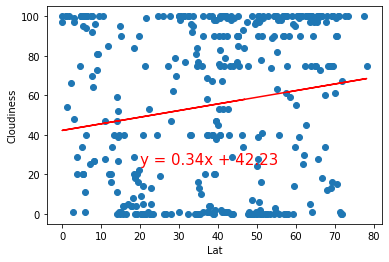

In [30]:
x = northern_df["Lat"]
y = northern_df["Cloudiness"]
linear_regression(x,y)

The most of cloudiness values lies on the bottom or at the really highness of the graph. That means that it will affect in a really aggresive way the linear equation. There's no relationship between latitude and cloudiness.

#### Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Linear Equation: y = 0.77x + 66.81
The r-squared is: 0.07431578866724864


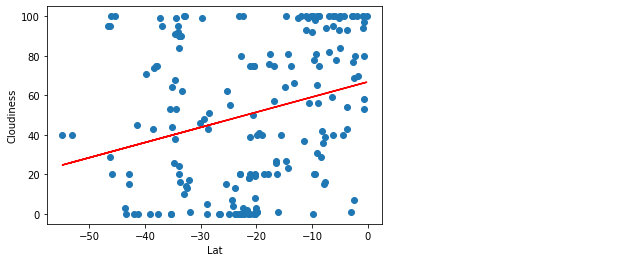

In [31]:
x = southern_df["Lat"]
y = southern_df["Cloudiness"]
linear_regression(x,y)

The most of cloudiness values lies on the bottom or at the really highness of the graph. That means that it will affect in a really aggresive way the linear equation. There's no relationship between latitude and cloudiness.

#### Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Linear Equation: y = 0.09x + 5.91
The r-squared is: 0.06911987455531184


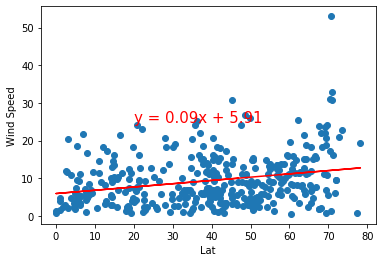

In [32]:
x = northern_df["Lat"]
y = northern_df["Wind Speed"]
linear_regression(x,y)

The outliers messed up the linear regression; those that lies on the 60-80 latitude. Because of those outliers, the linear equation is not valid because the R-squared is too low. It might improve if we take off the wind speed greater than 9 or so. 

#### Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Linear Equation: y = -0.15x + 4.24
The r-squared is: 0.11890475350712941


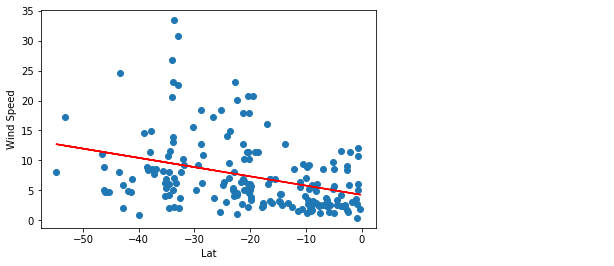

In [33]:
x = southern_df["Lat"]
y = southern_df["Wind Speed"]
linear_regression(x,y)

The tendency is that the souther you go, you will find higher wind speed at this time of the day. But, as the equation above, the linear equation is not valid because of the outliers. 